This progream uses an artificial recurrent network called Long Short Term Mememory (LSTM) to predict the closing stock price of a corporation (Amazon.com Inc.) using the past 60 day stock price. We will be analyzing the stock trend from 2012 to 2020-04-01 and train our model. The objective is gauge the accuracy of the LSTM model in predicting the closing stock price that will help us decide whether or not to invest in the stock market now.

In [25]:
# Import libraries
import math
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [26]:
# get the stock quote
df = web.DataReader('AAPL', data_source = 'yahoo', start = '2012-01-01', end = '2020-04-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.994907
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.268970
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.838169
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.380054
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.296970
...,...,...,...,...,...,...
2020-03-26,258.679993,246.360001,246.520004,258.440002,63021800.0,258.440002
2020-03-27,255.869995,247.050003,252.750000,247.740005,51054200.0,247.740005
2020-03-30,255.520004,249.399994,250.740005,254.809998,41994100.0,254.809998


In [27]:
# Get the number of rows and column in the data set.
df.shape

(2075, 6)

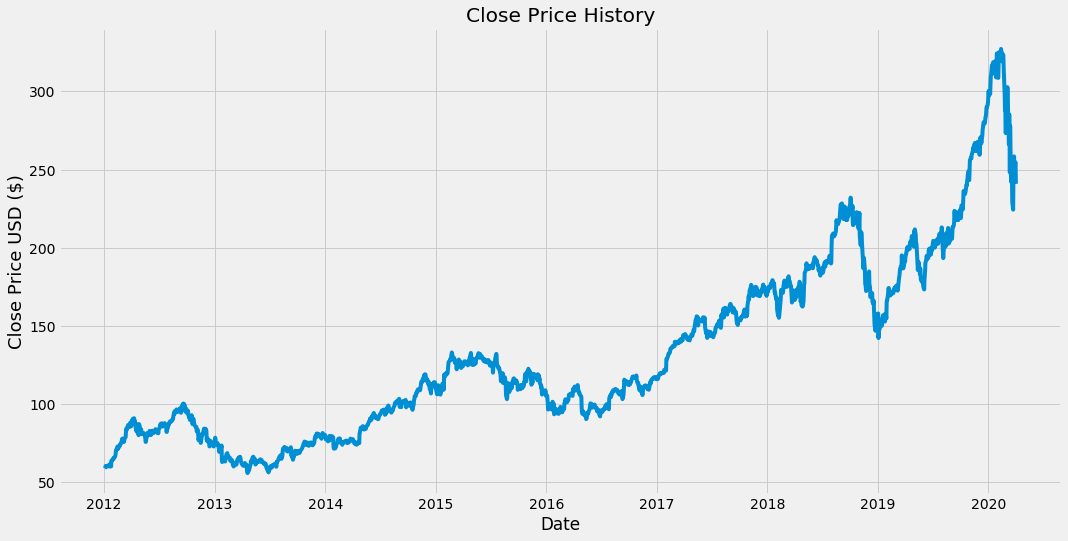

In [28]:
# Visualize the closing price history.

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [29]:
# Create a new dataframe with only the 'Close' column.
data=df.filter(['Close'])

#Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*0.8)

training_data_len

1660

In [30]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [31]:
# Create the scaled training data set.
train_data = scaled_data[0: training_data_len, :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i <= 60:
        print('x_train =', x_train)
        print('y_train =', y_train)

x_train = [array([0.01089548, 0.01205872, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541158, 0.01798544,
       0.02030665, 0.01959081, 0.01566949, 0.01941185, 0.01572739,
       0.02954412, 0.02847562, 0.02987047, 0.03288645, 0.03471289,
       0.03456025, 0.03399706, 0.03639722, 0.03865526, 0.04121335,
       0.04534521, 0.05402475, 0.05415633, 0.05898825, 0.06259901,
       0.05639331, 0.05878296, 0.0587356 , 0.06543606, 0.06448335,
       0.06624662, 0.06941526, 0.07117856, 0.07625785, 0.07995811,
       0.08102658, 0.0814003 , 0.07507357, 0.07354712, 0.07377347,
       0.07972122, 0.08139505, 0.08499001, 0.09346428, 0.10477032,
       0.10265438, 0.10265964, 0.11083389, 0.11339195, 0.11157078,
       0.10990752, 0.10817582, 0.11392883, 0.11787649, 0.11952923])]
y_train = [0.11544472908538655]


In [32]:
# Conver the x_train and y_train to numpy arrays.
x_train, y_train = np.array(x_train), np.array(y_train)

In [33]:
# Reshape the data to fit LSTM model requirement.
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1600, 60, 1)

In [34]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [35]:
# Compile the model.
model.compile(optimizer='adam', loss='mean_squared_error')

In [36]:
# Train the model.
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

Epoch 1/1
1600/1600 [==============================] - 68s 43ms/step - loss: 5.6329e-04


In [37]:
# Create the testing data set
# Create a new array containing scaled values from the index 1543 to 2003.
test_data = scaled_data[training_data_len - 60: , :]

# Create the dat sets x_test and y_test.
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60: i, 0])

In [38]:
# Convert the data to a numpy array.
x_test = np.array(x_test)

In [39]:
# Reshape the data.
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(415, 60, 1)

In [40]:
# Get the models predicted price values.
predictions = model.predict(x_test)

# Inverse transform the data
predictions = scaler.inverse_transform(predictions)

In [41]:
# Get the root mean squared error (RMSE). The lower value the RMSE the better the fit.

rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.0808896719691266

C:\Users\16123\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


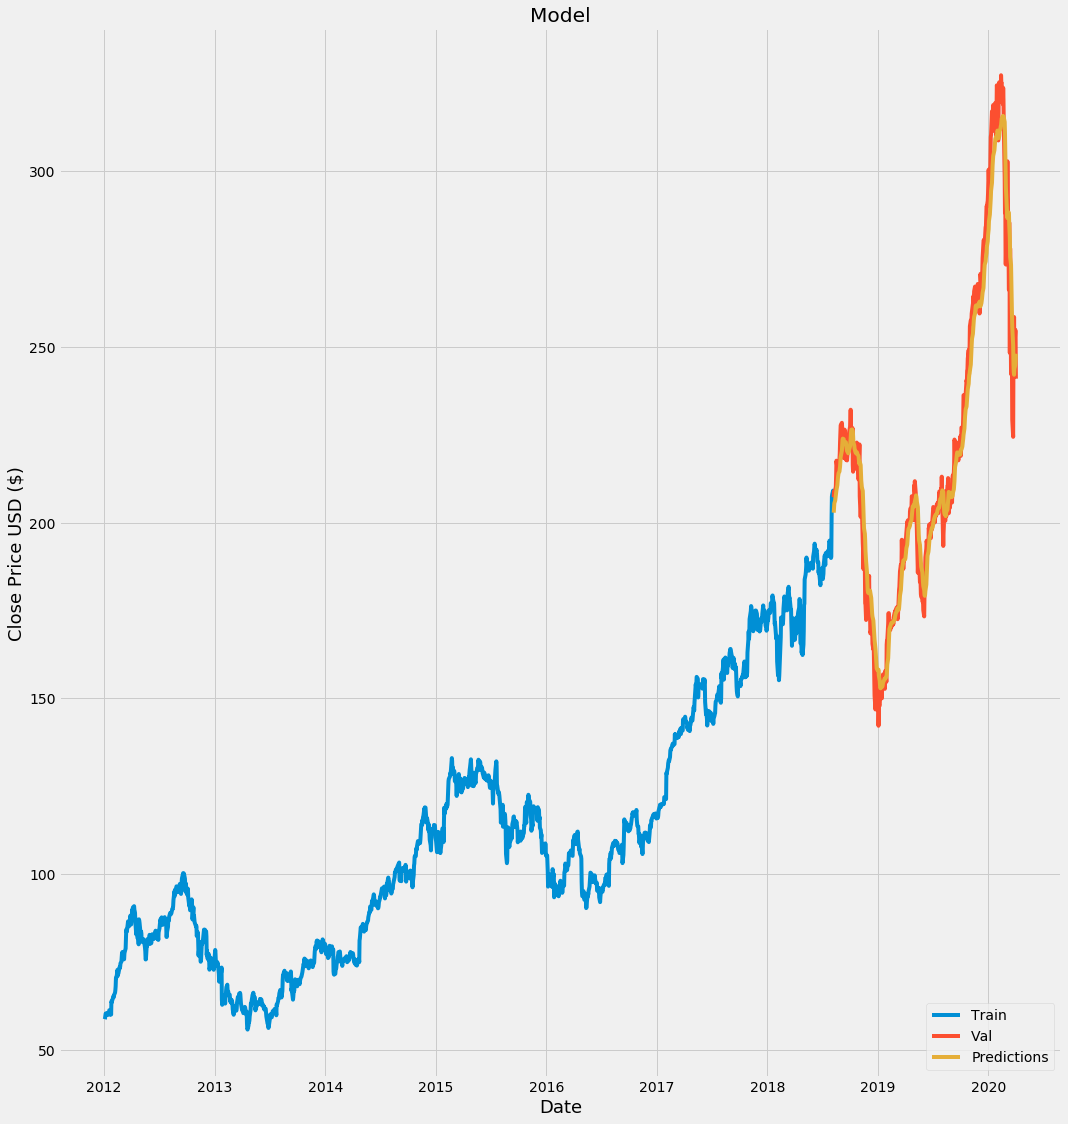

In [42]:
# Plot the data.
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,18))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [43]:
# Show the valid and predicted prices.
valid

,Close,Predictions
Date,,
2018-08-08,207.250000,202.799072
2018-08-09,208.880005,204.238449
2018-08-10,207.529999,205.478897
2018-08-13,208.869995,206.299942
2018-08-14,209.750000,207.000519
...,...,...
2020-03-26,258.440002,242.019440
2020-03-27,247.740005,243.680893
2020-03-30,254.809998,244.787262


In [44]:
# Predict the closing price for Apple stock.
# Get the quote
apple_quote = web.DataReader('AAPL', data_source = 'yahoo', start = '2012-01-01', end = '2020-04-01')

# Create a new dataframe.
new_df = apple_quote.filter(['Close'])

# Get the last 60 day closing price values and convert the dataframe to an array.
last_60_days = new_df[-60:].values

# Scale the data to be values between 0 and 1.
last_60_days_scaled = scaler.transform(last_60_days)

In [45]:
# Create and empty list and append the past 60 days.
X_test = []
X_test.append(last_60_days_scaled)

# Convert the X_test data set to a numpy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price.
pred_price = model.predict(X_test)

# Undo the scaling.
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[247.63283]]


In [46]:
# Get the quote
apple_quote2 = web.DataReader('AAPL', data_source = 'yahoo', start = '2020-03-01', end = '2020-04-01')
print(apple_quote2['Close'])

Date
2020-03-02    298.809998
2020-03-03    289.320007
2020-03-04    302.739990
2020-03-05    292.920013
2020-03-06    289.029999
2020-03-09    266.170013
2020-03-10    285.339996
2020-03-11    275.429993
2020-03-12    248.229996
2020-03-13    277.970001
2020-03-16    242.210007
2020-03-17    252.860001
2020-03-18    246.669998
2020-03-19    244.779999
2020-03-20    229.240005
2020-03-23    224.369995
2020-03-24    246.880005
2020-03-25    245.520004
2020-03-26    258.440002
2020-03-27    247.740005
2020-03-30    254.809998
2020-03-31    254.289993
2020-04-01    240.910004
Name: Close, dtype: float64


The predicted closing price from the LSTM model is relatively similar to the actual closing price in recent days. Furthermore, the LSTM model prediction of AAPL closing price was similar in the trend of the actual closing price in the last year. In conclusion, the LSTM model is a good predictor of a stock closing price. The LSTM model should only be used to predict stock closing prices within a few days or a couple weeks.Predicting the closing stock price for next month or three months can be difficult at the moment due to many uncertainties that arrise with the pandemic spread of COVID-19. We can analyse the data and find trends of decreasing closing price and understand the cause of these trends.

There are four decreasing closing price trend on the plot, in which those years are 2013, 2016, 2018, 2020. In 2013, there was Government shutdown that for 16 days due to Congressional budget dispute over the Patient Protection and Affordable Care Act. In 2016, there was the Presidential election and the Zika virus epidemic. Also, in 2018 there was another Government shutdown for 35 days disputing over funding for a barrier expansion onf the U.S.-Mexico border. The most recent decreasing trend in closing stock price is caused by the pandemic COVID-19. All of these events has a major impact in the US economy.

By knowing our current events, we can make better predictions of the stock prices and the stock market for the near future. Usually the stock prices and the stock market picks up again once the economy is stable. Decreasing stock prices may not necessarily be bad, for instance, this may be the perfect time to buy more stocks since prices are low and hold on to them until the economy improves. The investment may be a risk, but may be worth it. 